# Transfer studies

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("pdf", "svg")

from pipoli.core import Dimension

In [3]:
DATA = Path() / "output" / "data" / "data-similar-'m'-'L'-'g'-(-1, 1)-(-1, 1)-(0, 0)-10-10-1-10.pkl.gz"

In [4]:
all_data = pd.read_pickle(DATA)

In [5]:
BASE = all_data.attrs["base"]
all_data.attrs

{'base': ['m', 'L', 'g'],
 'space': 'log',
 'b': 10,
 'range_1': (-1, 1),
 'range_2': (-1, 1),
 'range_3': (0, 0),
 'num_1': 10,
 'num_2': 10,
 'num_3': 1,
 'nb_eval_episodes': 10,
 'observations_shape': '(nb_episodes, nb_steps, 17)',
 'actions_shape': '(nb_episodes, nb_steps, 6)',
 'rewards_shape': '(nb_episodes, nb_steps)',
 'infos_shape': '(nb_episodes, nb_steps)',
 'policy_info': {'repo_id': 'farama-minari/HalfCheetah-v5-TQC-expert',
  'filename': 'halfcheetah-v5-TQC-expert.zip',
  'commit': '995505a'},
 'env': 'HalfCheetah-v5',
 'comment': "env has custom xml_file, forward_reward_weight and ctrl_cost_weight supplied by the context\nto make the reward function of the env dimensionally homogeneous, it is assumed that the weight's dimensions are such that [reward] = 1\nall the contexts are similar\nthe policy was scaled (scaled transfer)"}

## Similar transfer study

### Data processing

In [6]:
BASE_DIMENSIONS = [
    M := Dimension([1, 0, 0]),
    L := Dimension([0, 1, 0]),
    T := Dimension([0, 0, 1]),
]
Unit = Dimension([0, 0, 0])

In [7]:
process_df = all_data[["context", "b1", "b2", "b3", "infos"]].sort_values(["b1", "b2", "b3"])

In [8]:
process_df

,context,b1,b2,b3,infos
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.050000,9.81,"[[{'x_position': -0.07616901846035783, 'x_velo..."
cheetah-m-L-g_1.400e+00_8.341e-02_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.083405,9.81,"[[{'x_position': -0.007534650893060764, 'x_vel..."
cheetah-m-L-g_1.400e+00_1.391e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.139128,9.81,"[[{'x_position': 0.04948572581590848, 'x_veloc..."
cheetah-m-L-g_1.400e+00_2.321e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.232079,9.81,"[[{'x_position': 0.10397014510149497, 'x_veloc..."
cheetah-m-L-g_1.400e+00_3.871e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.387132,9.81,"[[{'x_position': 0.06844263029380615, 'x_veloc..."
...,...,...,...,...,...
cheetah-m-L-g_1.400e+02_6.458e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",140.0,0.645775,9.81,"[[{'x_position': 0.04365327028572759, 'x_veloc..."
cheetah-m-L-g_1.400e+02_1.077e+00_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",140.0,1.077217,9.81,"[[{'x_position': -0.07696585798497807, 'x_velo..."
cheetah-m-L-g_1.400e+02_1.797e+00_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",140.0,1.796907,9.81,"[[{'x_position': -0.2000004035944715, 'x_veloc..."
cheetah-m-L-g_1.400e+02_2.997e+00_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",140.0,2.997421,9.81,"[[{'x_position': -0.2639691304917244, 'x_veloc..."


In [ ]:
def extract_adim_reward_forward(infos, context, base):
    forward_reward_adim, _ = context.make_transforms([L / T], base)
    reward = np.vectorize(lambda infs: forward_reward_adim(infs["reward_forward"])[0])
    return reward(infos)

def extract_adim_reward_ctrl(infos, context, base):
    control_cost_adim, _ = context.make_transforms([M**2*L**4/T**4], base)
    reward = np.vectorize(lambda infs: control_cost_adim(infs["reward_ctrl"])[0])
    return reward(infos)


extract_adim_reward_ctrl(all_data["infos"].iat[0][0, 0], all_data["context"].iat[0], BASE)

array(-6.45291211e-05)

In [ ]:
original_context = process_df["context"].loc["original"]

process_df["adimensional_distance_to_original"] = process_df["context"].map(lambda c: c.adimensional_distance(original_context, BASE))
process_df["cosine_similarity_to_original"] = process_df["context"].map(lambda c: c.cosine_similarity(original_context))
process_df["rewards_forward"] = process_df["infos"].map(np.vectorize(lambda infos: infos["reward_forward"]))
process_df["rewards_ctrl"] = process_df["infos"].map(np.vectorize(lambda infos: infos["reward_ctrl"]))
process_df["totals_reward_forward"] = process_df["rewards_forward"].map(lambda r: r.sum(axis=1))
process_df["totals_reward_ctrl"] = process_df["rewards_ctrl"].map(lambda r: r.sum(axis=1))
process_df["totals_reward"] = process_df.apply(lambda row: row["totals_reward_forward"] + row["totals_reward_ctrl"], axis=1)
process_df["mean_total_reward_forward"] = process_df["totals_reward_forward"].map(np.mean)
process_df["mean_total_reward_ctrl"] = process_df["totals_reward_ctrl"].map(np.mean)
process_df["mean_total_reward"] = process_df["totals_reward"].map(np.mean)
process_df["std_total_reward_forward"] = process_df["totals_reward_forward"].map(np.std)
process_df["std_total_reward_ctrl"] = process_df["totals_reward_ctrl"].map(np.std)
process_df["std_total_reward"] = process_df["totals_reward"].map(np.std)
process_df["mean_total_reward_difference"] = process_df["mean_total_reward"] - process_df["mean_total_reward"].loc["original"]

In [26]:
process_df

,context,b1,b2,b3,infos,adimensional_distance_to_original,cosine_similarity_to_original,rewards_forward,rewards_ctrl,totals_reward_forward,totals_reward_ctrl,totals_reward,mean_total_reward_forward,mean_total_reward_ctrl,mean_total_reward,std_total_reward_forward,std_total_reward_ctrl,std_total_reward,mean_total_reward_difference
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.050000,9.81,"[[{'x_position': -0.07616901846035783, 'x_velo...",5.684342e-14,0.004486,"[[-0.28588748616871223, -0.2879755363419195, -...","[[-0.2944638262678786, -0.178302597011611, -0....","[26.770158450275364, 12.130980660724504, 26.82...","[-309.92587178940425, -291.659901770989, -335....","[-283.1557133391289, -279.5289211102645, -308....",16.064450,-300.991646,-284.927196,7.293923,35.077284,33.090714,-17918.836415
cheetah-m-L-g_1.400e+00_8.341e-02_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.083405,9.81,"[[{'x_position': -0.007534650893060764, 'x_vel...",5.684618e-14,0.019323,"[[-0.1779068231944017, -0.18707551617753365, -...","[[-0.27566170126912826, -0.1500687151100564, -...","[46.67132486627111, 33.7943957137537, 1.283836...","[-296.0021430562341, -316.2477615881629, -263....","[-249.330818189963, -282.4533658744092, -262.3...",24.643287,-303.381348,-278.738061,14.321079,26.884204,25.350730,-17912.647280
cheetah-m-L-g_1.400e+00_1.391e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.139128,9.81,"[[{'x_position': 0.04948572581590848, 'x_veloc...",5.684965e-14,0.086683,"[[-0.1401735198238606, 0.0721726018453043, 0.1...","[[-0.28167795253202027, -0.36182148551077253, ...","[169.96449837849713, 36.172271721587784, 134.6...","[-315.8980288173295, -28.86389059465692, -295....","[-145.93353043883235, 7.308381126930865, -161....",123.272619,-279.567391,-156.294772,48.300763,85.285095,67.387391,-17790.203991
cheetah-m-L-g_1.400e+00_2.321e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.232079,9.81,"[[{'x_position': 0.10397014510149497, 'x_veloc...",5.656396e-16,0.364742,"[[0.24155538832804865, 0.165376498110336, 0.09...","[[-0.27792502524440926, -0.20397717644626848, ...","[212.97390080467858, 220.44745777425715, 75.61...","[-351.09562465697536, -333.80148043822544, -94...","[-138.12172385229678, -113.3540226639683, -19....",251.183259,-318.402004,-67.218745,76.024679,75.643507,59.057286,-17701.127964
cheetah-m-L-g_1.400e+00_3.871e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",1.4,0.387132,9.81,"[[{'x_position': 0.06844263029380615, 'x_veloc...",9.335327e-17,0.850574,"[[-0.045081507826984384, -0.25896887205461344,...","[[-0.24625250523418454, -0.3235501710992857, -...","[506.2648582559242, 689.2430892524847, 657.717...","[-324.4648359025386, -368.3299355118198, -334....","[181.8000223533856, 320.9131537406648, 323.434...",544.467924,-370.074003,174.393921,96.936943,29.653962,104.819719,-17459.515298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cheetah-m-L-g_1.400e+02_6.458e-01_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",140.0,0.645775,9.81,"[[{'x_position': 0.04365327028572759, 'x_veloc...",7.850462e-17,0.999694,"[[-0.34414697940207556, -0.20094188763351373, ...","[[-0.3496682442943624, -0.44434987500057244, -...","[7608.942921654932, 6767.557865790007, 7919.08...","[-408.92511819081324, -412.9147044557418, -412...","[7200.017803464119, 6354.643161334265, 7506.49...",7147.660797,-394.518282,6753.142515,998.851338,47.851355,957.089943,-10880.766704
cheetah-m-L-g_1.400e+02_1.077e+00_9.810e+00,"Context([Dimension([1 0 0]), Dimension([0 1 0]...",140.0,1.077217,9.81,"[[{'x_position': -0.07696585798497807, 'x_velo...",5.684689e-14,0.999464,"[[-0.3806350134617388, -0.14408453713684086, 0...","[[-0.3115157338016947, -0.33375201955900036, -...","[7506.755287992644, 6484.218358678696, 7395.95...","[-410.20129872564326, -404.990661788398, -408....","[7096.553989267001, 6079.2

In [27]:
score_df = process_df[["b1", "b2", "b3", "adimensional_distance_to_original", "cosine_similarity_to_original", "mean_total_reward", "std_total_reward", "mean_total_reward_forward", "std_total_reward_forward", "mean_total_reward_ctrl", "std_total_reward_ctrl"]].rename(columns=dict(zip(["b1", "b2", "b3"], BASE)))

### Visualization

In [28]:
def heatmap(df, x, y, C, /, title=None, xlabel=None, ylabel=None, zlabel=None, xscale="log", yscale="log", **kwargs):
    xs = np.array(df[x])
    ys = np.array(df[y])
    Cs = np.array(df[C])

    Nx = np.sqrt(xs.size).astype(int)
    Ny = np.sqrt(ys.size).astype(int)
    X = xs.reshape((Nx, Ny))
    Y = ys.reshape((Nx, Ny))
    Z = Cs.reshape((Nx, Ny))

    plt.figure()
    plt.pcolormesh(X, Y, Z, **kwargs)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.title(title or "")
    plt.xlabel(xlabel or x)
    plt.ylabel(ylabel or y)
    plt.colorbar(label=zlabel or C)

In [29]:
score_df

,m,L,g,adimensional_distance_to_original,cosine_similarity_to_original,mean_total_reward,std_total_reward,mean_total_reward_forward,std_total_reward_forward,mean_total_reward_ctrl,std_total_reward_ctrl
cheetah-m-L-g_1.400e+00_5.000e-02_9.810e+00,1.4,0.050000,9.81,5.684342e-14,0.004486,-284.927196,33.090714,16.064450,7.293923,-300.991646,35.077284
cheetah-m-L-g_1.400e+00_8.341e-02_9.810e+00,1.4,0.083405,9.81,5.684618e-14,0.019323,-278.738061,25.350730,24.643287,14.321079,-303.381348,26.884204
cheetah-m-L-g_1.400e+00_1.391e-01_9.810e+00,1.4,0.139128,9.81,5.684965e-14,0.086683,-156.294772,67.387391,123.272619,48.300763,-279.567391,85.285095
cheetah-m-L-g_1.400e+00_2.321e-01_9.810e+00,1.4,0.232079,9.81,5.656396e-16,0.364742,-67.218745,59.057286,251.183259,76.024679,-318.402004,75.643507
cheetah-m-L-g_1.400e+00_3.871e-01_9.810e+00,1.4,0.387132,9.81,9.335327e-17,0.850574,174.393921,104.819719,544.467924,96.936943,-370.074003,29.653962
...,...,...,...,...,...,...,...,...,...,...,...
cheetah-m-L-g_1.400e+02_6.458e-01_9.810e+00,140.0,0.645775,9.81,7.850462e-17,0.999694,6753.142515,957.089943,7147.660797,998.851338,-394.518282,47.851355
cheetah-m-L-g_1.400e+02_1.077e+00_9.810e+00,140.0,1.077217,9.81,5.684689e-14,0.999464,6543.960235,404.751079,6951.471952,405.394857,-407.511717,1.761719
cheetah-m-L-g_1.400e+02_1.797e+00_9.810e+00,140.0,1.796907,9.81,1.136887e-13,0.999124,6415.418258,207.803561,6819.136699,207.860756,-403.718441,1.788299
cheetah-m-L-g_1.400e+02_2.997e+00_9.810e+00,140.0,2.997421,9.81,5.684352e-14,0.998605,6275.216570,441.667207,6679.557078,442.537876,-404.340508,2.399017


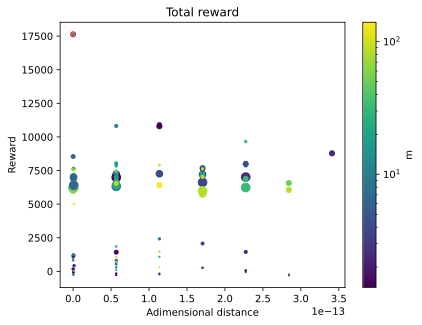

In [30]:
viz_df = score_df.sort_values(["adimensional_distance_to_original"])

viz_df.plot.scatter(
    x="adimensional_distance_to_original",
    y="mean_total_reward",
    s=viz_df["L"]*15,
    c="m",
    xlabel="Adimensional distance",
    ylabel="Reward",
    title="Total reward",
    legend=False,
    # cmap="coolwarm",
    norm="log", #colors.CenteredNorm(vcenter=original_context.value("m"))
    # logx=True,
)
plt.scatter(0, score_df.loc["original"]["mean_total_reward"], marker="o", s=25, facecolor="none", edgecolors="r")

La distance adimensionnelle ne semble pas être une bonne prédictrice de la qualité du transfer. Elles sont toutes pratiquement nulles et distribuées uniformément.
On note cependant qu'aucun transfert n'est meilleur que le contexte original.

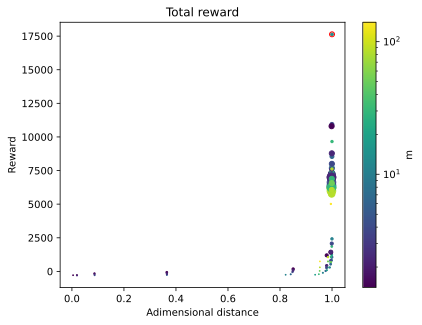

In [31]:
viz_df = score_df.sort_values(["adimensional_distance_to_original"])

viz_df.plot.scatter(
    x="cosine_similarity_to_original",
    y="mean_total_reward",
    s=viz_df["L"]*15,
    c="m",
    xlabel="Adimensional distance",
    ylabel="Reward",
    title="Total reward",
    legend=False,
    # cmap="coolwarm",
    norm="log", #colors.CenteredNorm(vcenter=original_context.value("m"))
    # logx=True,
)
plt.scatter(1, score_df.loc["original"]["mean_total_reward"], marker="o", s=25, facecolor="none", edgecolors="r")

La similarité cosinus a l'air légèrement meilleur, mais le seuil n'est pas évident à identifier...

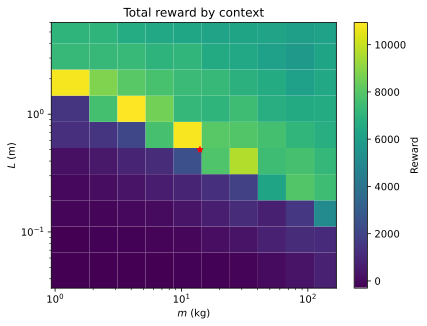

In [38]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "mean_total_reward",
    title="Total reward by context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    # norm=colors.TwoSlopeNorm(0), #"linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")
plt.savefig("output/figures/half_cheetah_similar_scaled_transfer_total_reward.png")

On se serait attendu à une couleur uniforme sur toute la grille si le transfert entre contextes similaires était parfait, or ce n'est pas le cas. Il y a une région où le transfer semble partiellement fonctionner, une région où le transfert ne semble pas bien fonctionner et une ligne où il est pratiquement parfait.

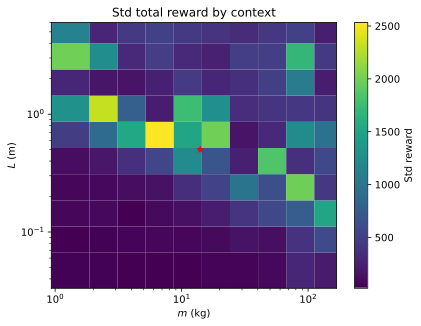

In [33]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "std_total_reward",
    title="Std total reward by context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Std reward",
    # norm=colors.TwoSlopeNorm(0), #"linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")
plt.savefig("output/figures/half_cheetah_similar_scaled_transfer_std_reward.png")

En regardant l'écart type des récompenses totales, on observe une région supérieure majoritairement certaine, une région inférieure où c'est plutôt certain et une région de transition où la performance est très incertaine.

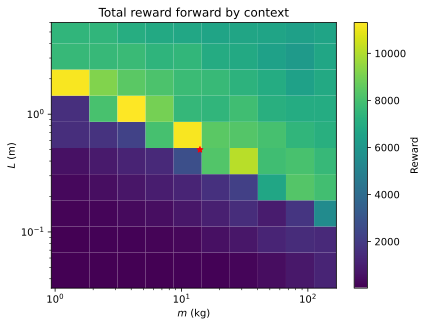

In [34]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "mean_total_reward_forward",
    title="Total reward forward by context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    # norm=colors.TwoSlopeNorm(0), #"linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

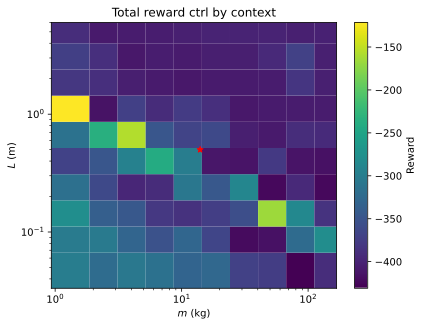

In [35]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "mean_total_reward_ctrl",
    title="Total reward ctrl by context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    norm="linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

En décomposant les récompenses totales, on constate que la pénalité de contrôle n'est pas le facteur dominant. La vitesse de déplacement contribue davantage et explique presque entièrement les résultats totaux.

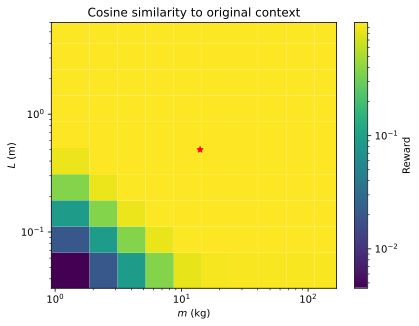

In [36]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "cosine_similarity_to_original",
    title="Cosine similarity to original context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    norm="log",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")

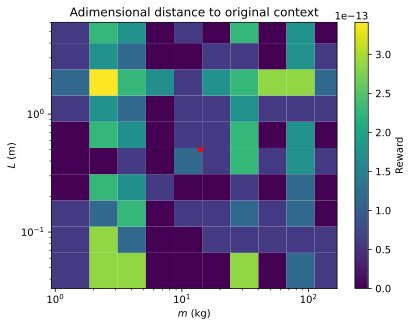

In [37]:
heatmap(
    score_df.drop("original").sort_values(["m", "L"]),
    "m",
    "L",
    "adimensional_distance_to_original",
    title="Adimensional distance to original context",
    xlabel="$m$ (kg)",
    ylabel="$L$ (m)",
    zlabel="Reward",
    norm="linear",
    # cmap="coolwarm",
    # xscale="linear",
    # yscale="linear",
)
plt.scatter(original_context.value("m"), original_context.value("L"), c="r", marker="*")